# Statistical Thinking: Hypothesis Testing & Inference
## Lesson 3 Part 1: Slides 15-18

This notebook covers hypothesis testing fundamentals, p-values, and error types.

---

In [1]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("‚úì All libraries loaded successfully!")

‚úì All libraries loaded successfully!


---
# SLIDE 15: Hypothesis Testing Overview

**Key Ideas:**
- Hypothesis testing is like a courtroom for data
- **Null hypothesis (H‚ÇÄ):** Nothing is happening, no effect (innocent until proven guilty)
- **Alternative hypothesis (H‚ÇÅ):** Something is happening, there is an effect
- Data is the evidence - if strong enough, we reject H‚ÇÄ

**Real-World Example:** Testing if a new ad increases sales

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_51876/3806523078.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot([old_ad_sales, new_ad_sales], positions=[1, 2], widths=0.5,
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_51876/3806523078.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


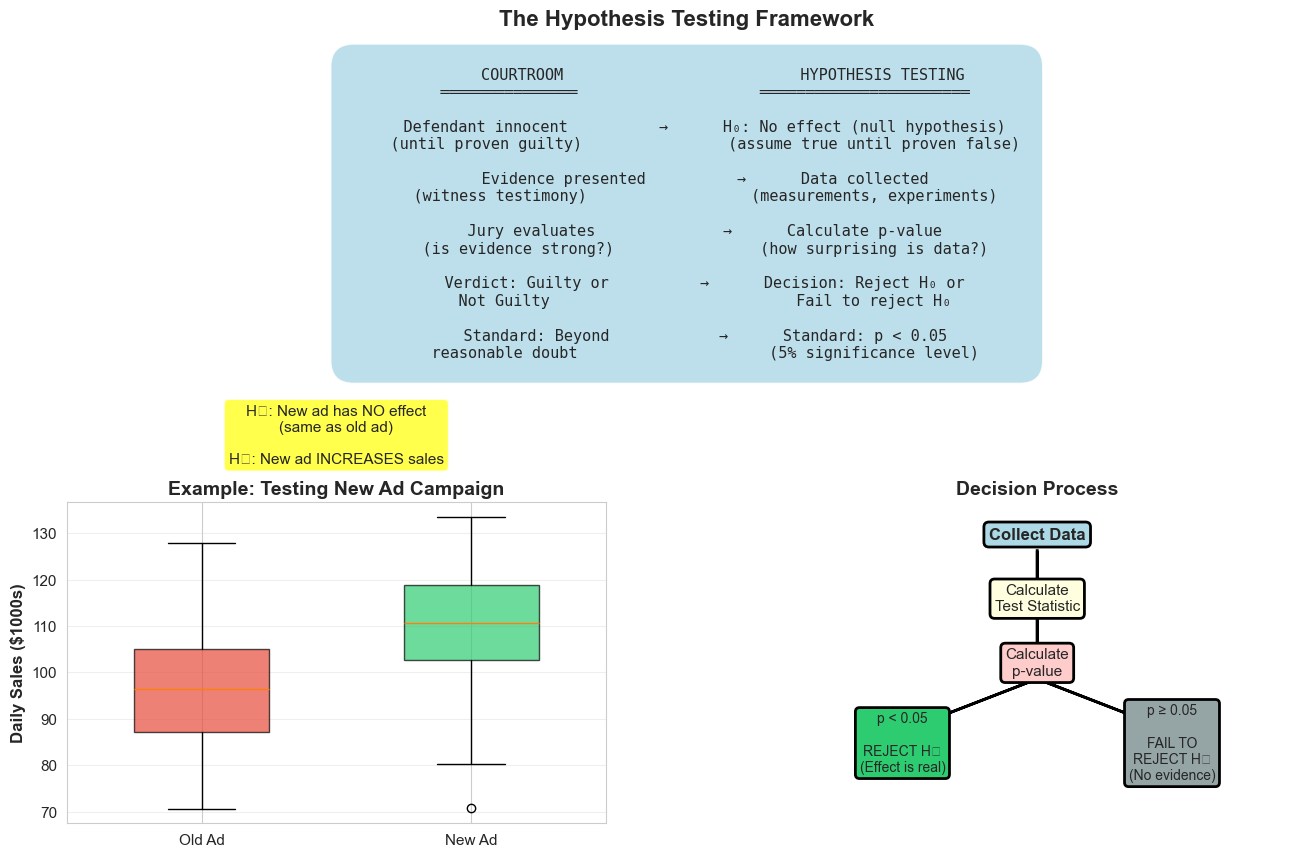


üìä KEY TAKEAWAYS:
‚Ä¢ H‚ÇÄ (null) = 'nothing is happening' - our starting assumption
‚Ä¢ H‚ÇÅ (alternative) = 'something is happening' - what we want to prove
‚Ä¢ We reject H‚ÇÄ only if evidence is very strong (p < 0.05)
‚Ä¢ Like a jury: innocent until proven guilty beyond reasonable doubt


In [2]:
# SLIDE 15 VISUALIZATION: Hypothesis Testing Framework

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# 1. Courtroom Analogy
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')

courtroom_comparison = (
    "        COURTROOM                          HYPOTHESIS TESTING\n"
    "    ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê                    ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê\n\n"
    "    Defendant innocent          ‚Üí      H‚ÇÄ: No effect (null hypothesis)\n"
    "    (until proven guilty)                (assume true until proven false)\n\n"
    "    Evidence presented          ‚Üí      Data collected\n"
    "    (witness testimony)                  (measurements, experiments)\n\n"
    "    Jury evaluates              ‚Üí      Calculate p-value\n"
    "    (is evidence strong?)                (how surprising is data?)\n\n"
    "    Verdict: Guilty or          ‚Üí      Decision: Reject H‚ÇÄ or\n"
    "    Not Guilty                           Fail to reject H‚ÇÄ\n\n"
    "    Standard: Beyond            ‚Üí      Standard: p < 0.05\n"
    "    reasonable doubt                     (5% significance level)"
)

ax1.text(0.5, 0.5, courtroom_comparison, ha='center', va='center', 
         fontsize=11, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8, pad=1.5))
ax1.set_title('The Hypothesis Testing Framework', fontsize=16, fontweight='bold', pad=20)

# 2. Real Example: Ad Campaign Test
ax2 = fig.add_subplot(gs[1, 0])

np.random.seed(42)
old_ad_sales = np.random.normal(100, 15, 50)
new_ad_sales = np.random.normal(110, 15, 50)

bp = ax2.boxplot([old_ad_sales, new_ad_sales], positions=[1, 2], widths=0.5, 
                  patch_artist=True, labels=['Old Ad', 'New Ad'])

for patch, color in zip(bp['boxes'], ['#e74c3c', '#2ecc71']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Daily Sales ($1000s)', fontsize=12, fontweight='bold')
ax2.set_title('Example: Testing New Ad Campaign', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

ax2.text(1.5, 145, 'H‚ÇÄ: New ad has NO effect\n(same as old ad)\n\nH‚ÇÅ: New ad INCREASES sales',
         ha='center', fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 3. Decision Tree
ax3 = fig.add_subplot(gs[1, 1])
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10)
ax3.axis('off')
ax3.set_title('Decision Process', fontsize=14, fontweight='bold')

ax3.text(5, 9, 'Collect Data', ha='center', va='center', fontsize=12, 
         fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightblue', 
                   edgecolor='black', linewidth=2))

ax3.arrow(5, 8.5, 0, -1, head_width=0.3, head_length=0.2, 
          fc='black', ec='black', linewidth=2)

ax3.text(5, 7, 'Calculate\nTest Statistic', ha='center', va='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightyellow', 
                   edgecolor='black', linewidth=2))

ax3.arrow(5, 6.5, 0, -1, head_width=0.3, head_length=0.2, 
          fc='black', ec='black', linewidth=2)

ax3.text(5, 5, 'Calculate\np-value', ha='center', va='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='#ffcccc', 
                   edgecolor='black', linewidth=2))

ax3.arrow(5, 4.5, -2, -1.3, head_width=0.3, head_length=0.2, 
          fc='black', ec='black', linewidth=2)
ax3.arrow(5, 4.5, 2, -1.3, head_width=0.3, head_length=0.2, 
          fc='black', ec='black', linewidth=2)

ax3.text(2.5, 2.5, 'p < 0.05\n\nREJECT H‚ÇÄ\n(Effect is real)', 
         ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='#2ecc71', 
                   edgecolor='black', linewidth=2))

ax3.text(7.5, 2.5, 'p ‚â• 0.05\n\nFAIL TO\nREJECT H‚ÇÄ\n(No evidence)', 
         ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='#95a5a6', 
                   edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()

print("\nüìä KEY TAKEAWAYS:")
print("‚Ä¢ H‚ÇÄ (null) = 'nothing is happening' - our starting assumption")
print("‚Ä¢ H‚ÇÅ (alternative) = 'something is happening' - what we want to prove")
print("‚Ä¢ We reject H‚ÇÄ only if evidence is very strong (p < 0.05)")
print("‚Ä¢ Like a jury: innocent until proven guilty beyond reasonable doubt")

---
# SLIDE 16: Logic of Hypothesis Testing

**Key Ideas:**
- Four steps to test a hypothesis:
  1. Start by assuming the null is true
  2. Ask: "How likely is this data if the null were true?"
  3. If very unlikely, reject the null
  4. If not unlikely, stick with the null

**Real-World Example:** Testing if a new website design increases conversions

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_51876/4157510189.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


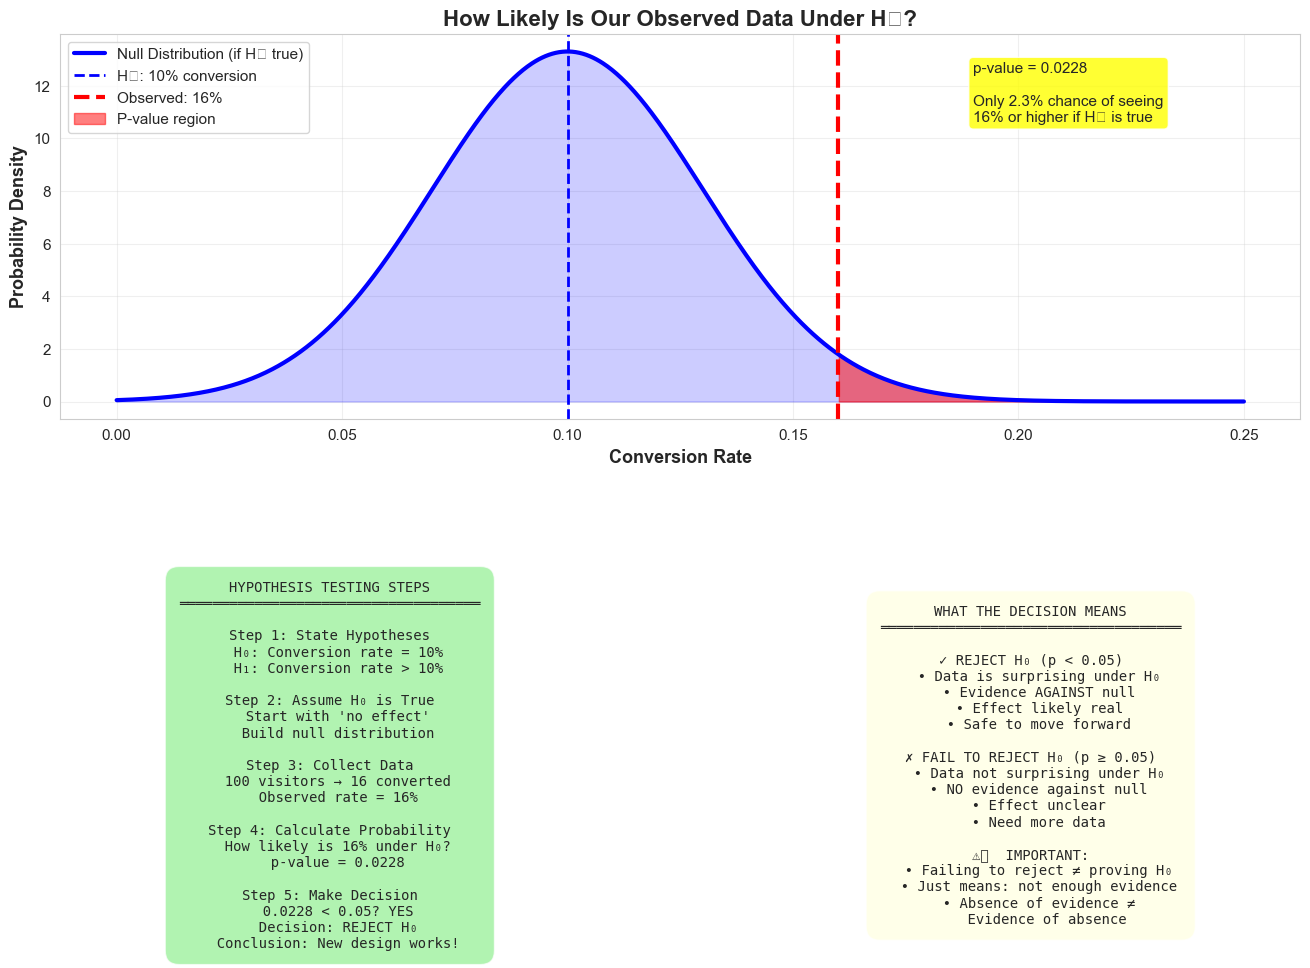


INTERACTIVE EXAMPLE

Website Conversion Test:
  H‚ÇÄ: Conversion rate = 10% (no improvement)
  H‚ÇÅ: Conversion rate > 10% (new design better)

Data: 16 out of 100 visitors converted (16%)

P-value: 0.0228

Decision: REJECT H‚ÇÄ

Conclusion: The new design significantly improves conversions!

üìä KEY TAKEAWAYS:
‚Ä¢ Always start by assuming H‚ÇÄ is true
‚Ä¢ Calculate: 'How surprising is my data?'
‚Ä¢ Very surprising (p < 0.05) ‚Üí reject H‚ÇÄ
‚Ä¢ Not surprising (p ‚â• 0.05) ‚Üí can't reject H‚ÇÄ


In [3]:
# SLIDE 16 VISUALIZATION: Logic of Hypothesis Testing

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# 1. The Null Distribution
ax1 = fig.add_subplot(gs[0, :])

null_mean = 0.10
n = 100
se = np.sqrt(null_mean * (1 - null_mean) / n)

x = np.linspace(0, 0.25, 1000)
y = stats.norm.pdf(x, null_mean, se)

ax1.plot(x, y, 'b-', linewidth=3, label='Null Distribution (if H‚ÇÄ true)')
ax1.fill_between(x, y, alpha=0.2, color='blue')
ax1.axvline(null_mean, color='blue', linestyle='--', linewidth=2, 
            label='H‚ÇÄ: 10% conversion')

observed = 0.16
ax1.axvline(observed, color='red', linestyle='--', linewidth=3, 
            label='Observed: 16%')

x_extreme = x[x >= observed]
y_extreme = stats.norm.pdf(x_extreme, null_mean, se)
ax1.fill_between(x_extreme, y_extreme, alpha=0.5, color='red', 
                 label='P-value region')

p_value = 1 - stats.norm.cdf(observed, null_mean, se)

ax1.set_xlabel('Conversion Rate', fontsize=13, fontweight='bold')
ax1.set_ylabel('Probability Density', fontsize=13, fontweight='bold')
ax1.set_title('How Likely Is Our Observed Data Under H‚ÇÄ?', 
              fontsize=16, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

ax1.text(0.19, max(y)*0.8, 
         f'p-value = {p_value:.4f}\n\nOnly {p_value:.1%} chance of seeing\n16% or higher if H‚ÇÄ is true',
         fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# 2. Step-by-Step Process
ax2 = fig.add_subplot(gs[1, 0])
ax2.axis('off')

steps_text = (
    "HYPOTHESIS TESTING STEPS\n"
    "‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê\n\n"
    "Step 1: State Hypotheses\n"
    "  H‚ÇÄ: Conversion rate = 10%\n"
    "  H‚ÇÅ: Conversion rate > 10%\n\n"
    "Step 2: Assume H‚ÇÄ is True\n"
    "  Start with 'no effect'\n"
    "  Build null distribution\n\n"
    "Step 3: Collect Data\n"
    "  100 visitors ‚Üí 16 converted\n"
    "  Observed rate = 16%\n\n"
    "Step 4: Calculate Probability\n"
    "  How likely is 16% under H‚ÇÄ?\n"
    f"  p-value = {p_value:.4f}\n\n"
    "Step 5: Make Decision\n"
    f"  {p_value:.4f} < 0.05? {'YES' if p_value < 0.05 else 'NO'}\n"
    f"  Decision: {'REJECT H‚ÇÄ' if p_value < 0.05 else 'FAIL TO REJECT H‚ÇÄ'}\n"
    f"  Conclusion: {'New design works!' if p_value < 0.05 else 'No clear evidence'}"
)

ax2.text(0.5, 0.5, steps_text, ha='center', va='center', 
         fontsize=10, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7, pad=1))

# 3. Interpretation Guide
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')

interpretation_text = (
    "WHAT THE DECISION MEANS\n"
    "‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê\n\n"
    "‚úì REJECT H‚ÇÄ (p < 0.05)\n"
    "  ‚Ä¢ Data is surprising under H‚ÇÄ\n"
    "  ‚Ä¢ Evidence AGAINST null\n"
    "  ‚Ä¢ Effect likely real\n"
    "  ‚Ä¢ Safe to move forward\n\n"
    "‚úó FAIL TO REJECT H‚ÇÄ (p ‚â• 0.05)\n"
    "  ‚Ä¢ Data not surprising under H‚ÇÄ\n"
    "  ‚Ä¢ NO evidence against null\n"
    "  ‚Ä¢ Effect unclear\n"
    "  ‚Ä¢ Need more data\n\n"
    "‚ö†Ô∏è  IMPORTANT:\n"
    "  ‚Ä¢ Failing to reject ‚â† proving H‚ÇÄ\n"
    "  ‚Ä¢ Just means: not enough evidence\n"
    "  ‚Ä¢ Absence of evidence ‚â†\n"
    "    Evidence of absence"
)

ax3.text(0.5, 0.5, interpretation_text, ha='center', va='center', 
         fontsize=10, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7, pad=1))

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERACTIVE EXAMPLE")
print("="*60)
print(f"\nWebsite Conversion Test:")
print(f"  H‚ÇÄ: Conversion rate = 10% (no improvement)")
print(f"  H‚ÇÅ: Conversion rate > 10% (new design better)")
print(f"\nData: 16 out of 100 visitors converted (16%)")
print(f"\nP-value: {p_value:.4f}")
print(f"\nDecision: {'REJECT H‚ÇÄ' if p_value < 0.05 else 'FAIL TO REJECT H‚ÇÄ'}")
print(f"\nConclusion: {'The new design significantly improves conversions!' if p_value < 0.05 else 'Not enough evidence.'}")

print("\nüìä KEY TAKEAWAYS:")
print("‚Ä¢ Always start by assuming H‚ÇÄ is true")
print("‚Ä¢ Calculate: 'How surprising is my data?'")
print("‚Ä¢ Very surprising (p < 0.05) ‚Üí reject H‚ÇÄ")
print("‚Ä¢ Not surprising (p ‚â• 0.05) ‚Üí can't reject H‚ÇÄ")

---
# SLIDE 17: Understanding P-values

**Key Ideas:**
- P-value = probability of seeing data this extreme if H‚ÇÄ is true
- Small p-value (< 0.05) = surprising ‚Üí evidence something's going on
- Large p-value = not surprising ‚Üí fits with "no effect"
- **MYTH:** P-value is NOT the chance the null is true!

**Real-World Example:** Testing ad click-through rate

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_51876/3671514882.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


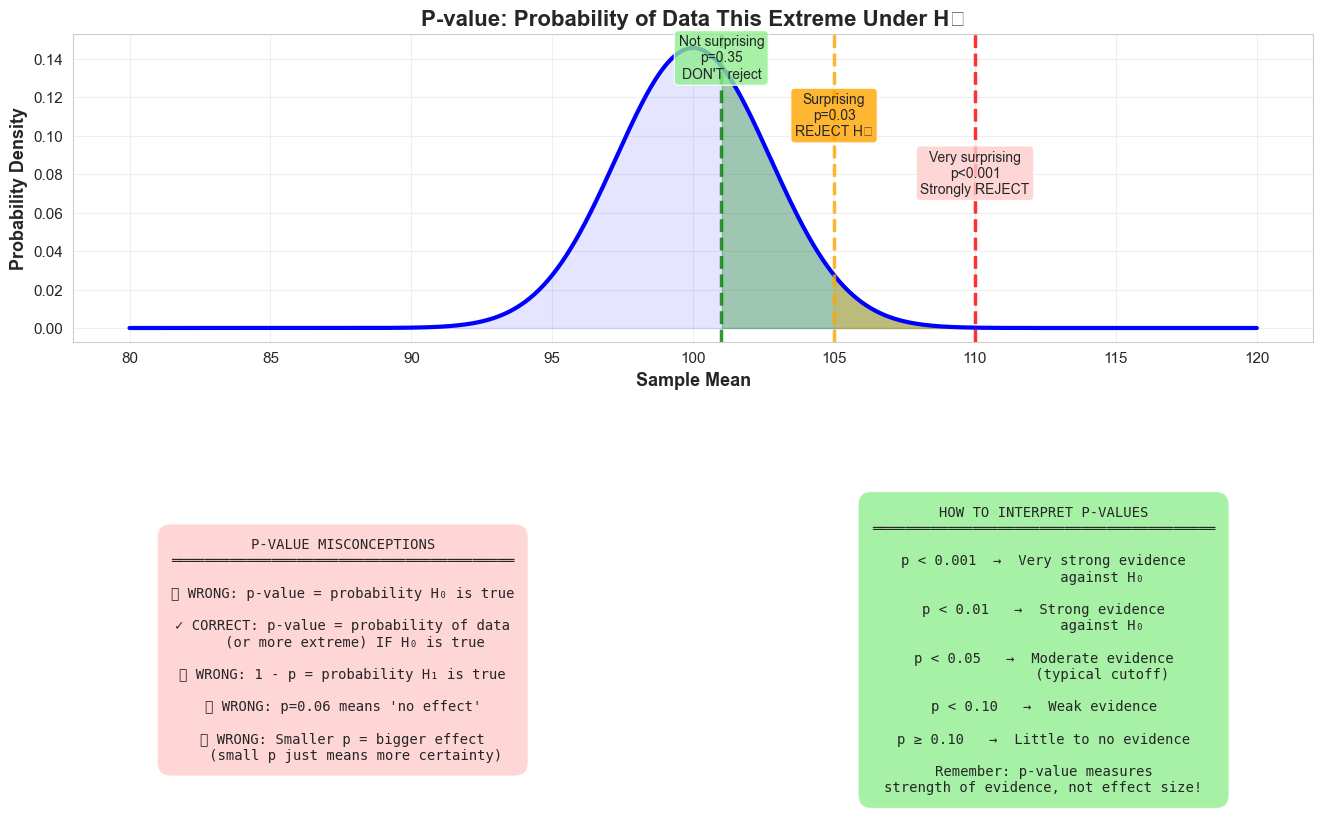


P-VALUE INTERPRETATION GUIDE

What p-value ACTUALLY means:
  'If H‚ÇÄ were true, what's the probability
   of observing data this extreme?'

Example: p = 0.03 means:
  'Only 3% chance of seeing this data
   if the null hypothesis is true'

üìä KEY TAKEAWAYS:
‚Ä¢ P-value = probability of data under H‚ÇÄ
‚Ä¢ Small p-value = data would be surprising if H‚ÇÄ true
‚Ä¢ p < 0.05 is conventional threshold
‚Ä¢ P-value ‚â† effect size


In [4]:
# SLIDE 17 VISUALIZATION: Understanding P-values

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

# 1. What IS a P-value?
ax1 = fig.add_subplot(gs[0, :])

null_mean = 100
null_std = 15
n = 30
se = null_std / np.sqrt(n)

x = np.linspace(80, 120, 1000)
y = stats.norm.pdf(x, null_mean, se)

ax1.plot(x, y, 'b-', linewidth=3, label='Null Distribution (H‚ÇÄ: Œº=100)')
ax1.fill_between(x, y, alpha=0.1, color='blue')

scenarios = [
    (101, 'green'),
    (105, 'orange'),
    (110, 'red')
]

for obs_mean, color in scenarios:
    ax1.axvline(obs_mean, color=color, linestyle='--', linewidth=2.5, alpha=0.8)
    p_val = 1 - stats.norm.cdf(obs_mean, null_mean, se)
    
    x_tail = x[x >= obs_mean]
    y_tail = stats.norm.pdf(x_tail, null_mean, se)
    ax1.fill_between(x_tail, y_tail, alpha=0.3, color=color)

ax1.set_xlabel('Sample Mean', fontsize=13, fontweight='bold')
ax1.set_ylabel('Probability Density', fontsize=13, fontweight='bold')
ax1.set_title('P-value: Probability of Data This Extreme Under H‚ÇÄ', 
              fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax1.text(101, 0.13, 'Not surprising\np=0.35\nDON\'T reject', ha='center', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax1.text(105, 0.10, 'Surprising\np=0.03\nREJECT H‚ÇÄ', ha='center', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='orange', alpha=0.8))
ax1.text(110, 0.07, 'Very surprising\np<0.001\nStrongly REJECT', ha='center', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='#ffcccc', alpha=0.8))

# 2. Common Misconceptions
ax2 = fig.add_subplot(gs[1, 0])
ax2.axis('off')

misconceptions = (
    "P-VALUE MISCONCEPTIONS\n"
    "‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê\n\n"
    "‚ùå WRONG: p-value = probability H‚ÇÄ is true\n\n"
    "‚úì CORRECT: p-value = probability of data\n"
    "   (or more extreme) IF H‚ÇÄ is true\n\n"
    "‚ùå WRONG: 1 - p = probability H‚ÇÅ is true\n\n"
    "‚ùå WRONG: p=0.06 means 'no effect'\n\n"
    "‚ùå WRONG: Smaller p = bigger effect\n"
    "   (small p just means more certainty)"
)

ax2.text(0.5, 0.5, misconceptions, ha='center', va='center', 
         fontsize=10, family='monospace',
         bbox=dict(boxstyle='round', facecolor='#ffcccc', alpha=0.8, pad=1))

# 3. Correct Interpretation
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')

correct = (
    "HOW TO INTERPRET P-VALUES\n"
    "‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê\n\n"
    "p < 0.001  ‚Üí  Very strong evidence\n"
    "              against H‚ÇÄ\n\n"
    "p < 0.01   ‚Üí  Strong evidence\n"
    "              against H‚ÇÄ\n\n"
    "p < 0.05   ‚Üí  Moderate evidence\n"
    "              (typical cutoff)\n\n"
    "p < 0.10   ‚Üí  Weak evidence\n\n"
    "p ‚â• 0.10   ‚Üí  Little to no evidence\n\n"
    "Remember: p-value measures\n"
    "strength of evidence, not effect size!"
)

ax3.text(0.5, 0.5, correct, ha='center', va='center', 
         fontsize=10, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8, pad=1))

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("P-VALUE INTERPRETATION GUIDE")
print("="*60)
print("\nWhat p-value ACTUALLY means:")
print("  'If H‚ÇÄ were true, what's the probability")
print("   of observing data this extreme?'")
print("\nExample: p = 0.03 means:")
print("  'Only 3% chance of seeing this data")
print("   if the null hypothesis is true'")

print("\nüìä KEY TAKEAWAYS:")
print("‚Ä¢ P-value = probability of data under H‚ÇÄ")
print("‚Ä¢ Small p-value = data would be surprising if H‚ÇÄ true")
print("‚Ä¢ p < 0.05 is conventional threshold")
print("‚Ä¢ P-value ‚â† effect size")

---
# SLIDE 18: Type I and Type II Errors

**Key Ideas:**
- **Type I Error (False Positive):** Reject H‚ÇÄ when it's actually true
- **Type II Error (False Negative):** Fail to reject H‚ÇÄ when it's actually false
- **Power = 1 - Type II error rate**

**Real-World Example:** Fraud detection

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_51876/1411675475.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


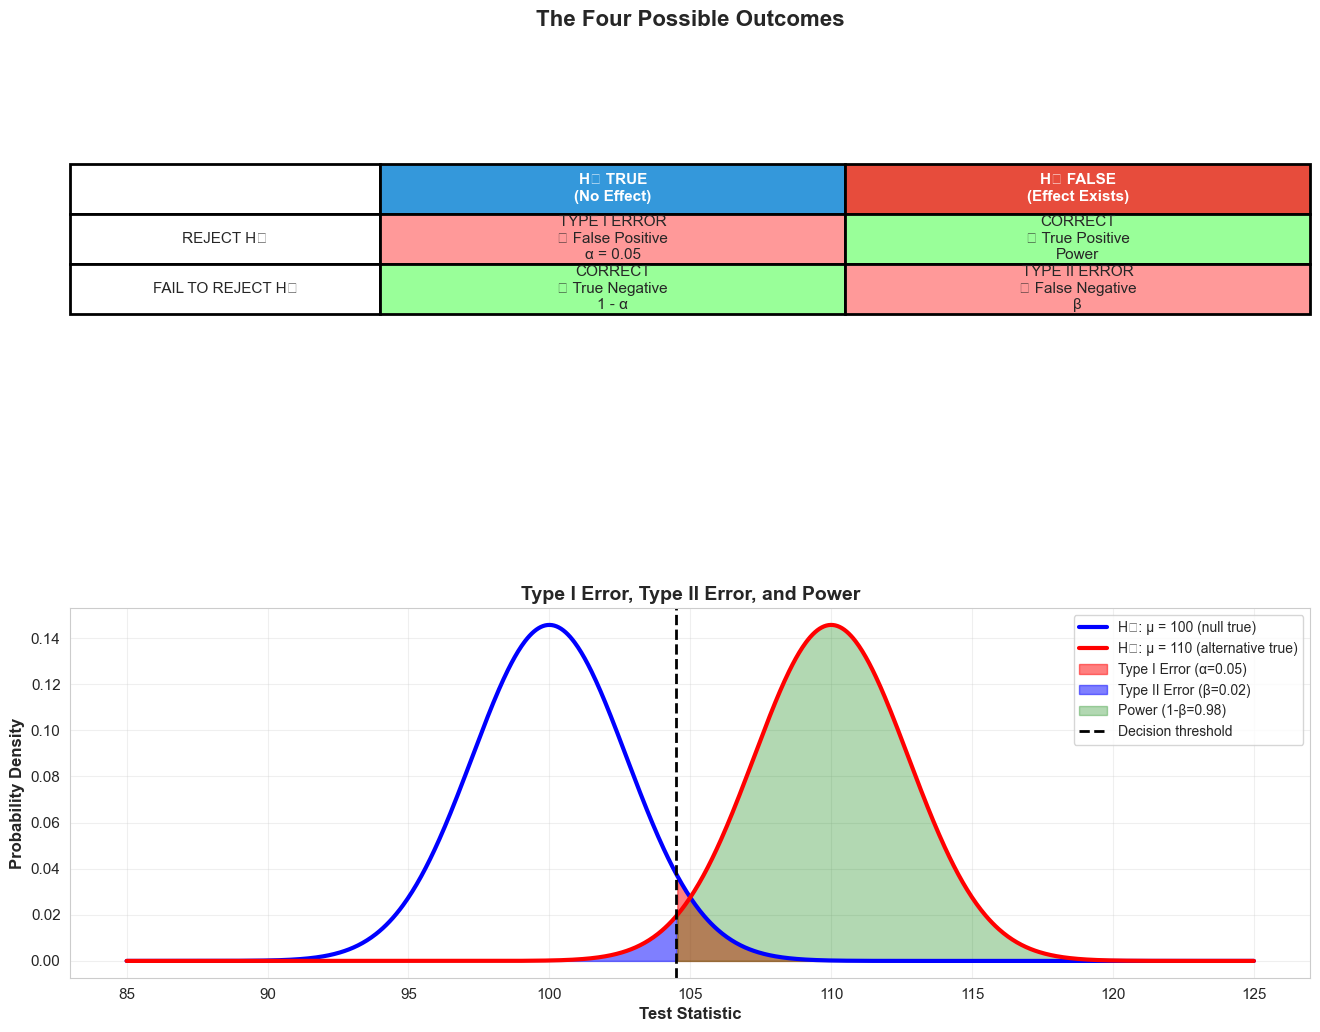


ERROR TYPES SUMMARY

Type I Error (False Positive):
  ‚Ä¢ Reject H‚ÇÄ when H‚ÇÄ is actually true
  ‚Ä¢ 'Crying wolf' - see effect that isn't there
  ‚Ä¢ Probability = Œ± (usually 0.05)

Type II Error (False Negative):
  ‚Ä¢ Fail to reject H‚ÇÄ when H‚ÇÅ is actually true
  ‚Ä¢ Miss a real effect
  ‚Ä¢ Probability = Œ≤ (depends on effect size)

Statistical Power:
  ‚Ä¢ Power = 1 - Œ≤
  ‚Ä¢ Probability of detecting real effect
  ‚Ä¢ Want power ‚â• 0.80 (80%)

üìä KEY TAKEAWAYS:
‚Ä¢ Type I = false alarm
‚Ä¢ Type II = missed detection
‚Ä¢ Can't eliminate both - there's a trade-off
‚Ä¢ Larger samples reduce both errors


In [5]:
# SLIDE 18 VISUALIZATION: Type I and Type II Errors

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

# 1. Error Types Matrix
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')

matrix_data = [
    ["", "H‚ÇÄ TRUE\n(No Effect)", "H‚ÇÄ FALSE\n(Effect Exists)"],
    ["REJECT H‚ÇÄ", "TYPE I ERROR\n‚ùå False Positive\nŒ± = 0.05", 
     "CORRECT\n‚úì True Positive\nPower"],
    ["FAIL TO REJECT H‚ÇÄ", "CORRECT\n‚úì True Negative\n1 - Œ±",
     "TYPE II ERROR\n‚ùå False Negative\nŒ≤"]
]

table = ax1.table(cellText=matrix_data, cellLoc='center', loc='center',
                  colWidths=[0.25, 0.375, 0.375])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)

table[(0, 1)].set_facecolor('#3498db')
table[(0, 1)].set_text_props(weight='bold', color='white')
table[(0, 2)].set_facecolor('#e74c3c')
table[(0, 2)].set_text_props(weight='bold', color='white')

table[(1, 1)].set_facecolor('#ff9999')
table[(1, 2)].set_facecolor('#99ff99')
table[(2, 1)].set_facecolor('#99ff99')
table[(2, 2)].set_facecolor('#ff9999')

for i in range(3):
    for j in range(3):
        table[(i, j)].set_edgecolor('black')
        table[(i, j)].set_linewidth(2)

ax1.set_title('The Four Possible Outcomes', fontsize=16, fontweight='bold', pad=20)

# 2. Distributions with Errors
ax2 = fig.add_subplot(gs[1, :])

null_mean = 100
alt_mean = 110
std = 15
n = 30
se = std / np.sqrt(n)

x = np.linspace(85, 125, 1000)
y_null = stats.norm.pdf(x, null_mean, se)
y_alt = stats.norm.pdf(x, alt_mean, se)

alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha, null_mean, se)

ax2.plot(x, y_null, 'b-', linewidth=3, label='H‚ÇÄ: Œº = 100 (null true)')
ax2.plot(x, y_alt, 'r-', linewidth=3, label='H‚ÇÅ: Œº = 110 (alternative true)')

# Type I Error
x_type1 = x[x >= critical_value]
y_type1 = stats.norm.pdf(x_type1, null_mean, se)
ax2.fill_between(x_type1, y_type1, alpha=0.5, color='red', 
                 label=f'Type I Error (Œ±={alpha})')

# Type II Error
beta = stats.norm.cdf(critical_value, alt_mean, se)
x_type2 = x[x < critical_value]
y_type2 = stats.norm.pdf(x_type2, alt_mean, se)
ax2.fill_between(x_type2, y_type2, alpha=0.5, color='blue', 
                 label=f'Type II Error (Œ≤={beta:.2f})')

# Power
power = 1 - beta
x_power = x[x >= critical_value]
y_power = stats.norm.pdf(x_power, alt_mean, se)
ax2.fill_between(x_power, y_power, alpha=0.3, color='green', 
                 label=f'Power (1-Œ≤={power:.2f})')

ax2.axvline(critical_value, color='black', linestyle='--', linewidth=2, 
            label='Decision threshold')

ax2.set_xlabel('Test Statistic', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax2.set_title('Type I Error, Type II Error, and Power', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ERROR TYPES SUMMARY")
print("="*60)
print("\nType I Error (False Positive):")
print("  ‚Ä¢ Reject H‚ÇÄ when H‚ÇÄ is actually true")
print("  ‚Ä¢ 'Crying wolf' - see effect that isn't there")
print("  ‚Ä¢ Probability = Œ± (usually 0.05)")

print("\nType II Error (False Negative):")
print("  ‚Ä¢ Fail to reject H‚ÇÄ when H‚ÇÅ is actually true")
print("  ‚Ä¢ Miss a real effect")
print("  ‚Ä¢ Probability = Œ≤ (depends on effect size)")

print("\nStatistical Power:")
print("  ‚Ä¢ Power = 1 - Œ≤")
print("  ‚Ä¢ Probability of detecting real effect")
print("  ‚Ä¢ Want power ‚â• 0.80 (80%)")

print("\nüìä KEY TAKEAWAYS:")
print("‚Ä¢ Type I = false alarm")
print("‚Ä¢ Type II = missed detection")
print("‚Ä¢ Can't eliminate both - there's a trade-off")
print("‚Ä¢ Larger samples reduce both errors")